# Exploratory Data Analysis

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment  

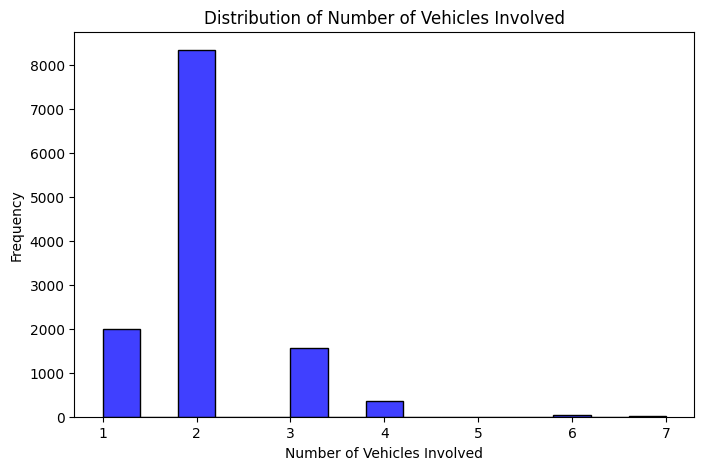

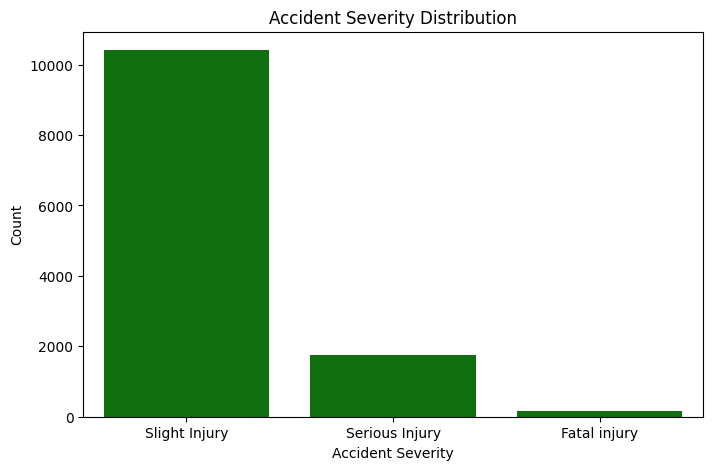

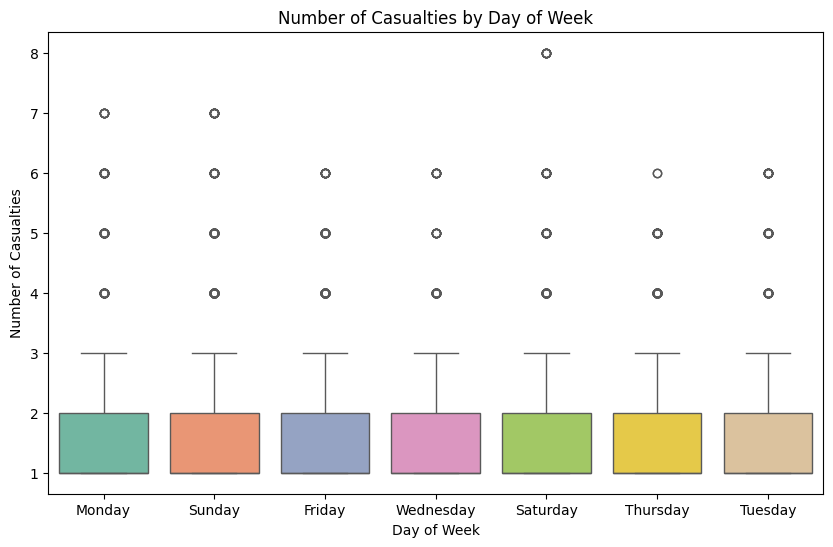

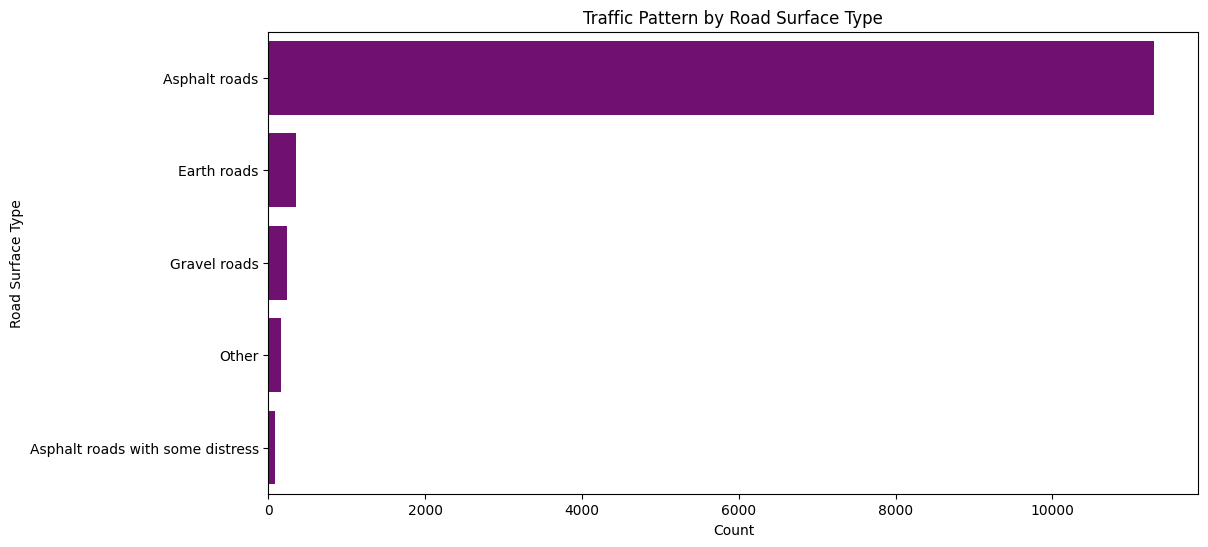

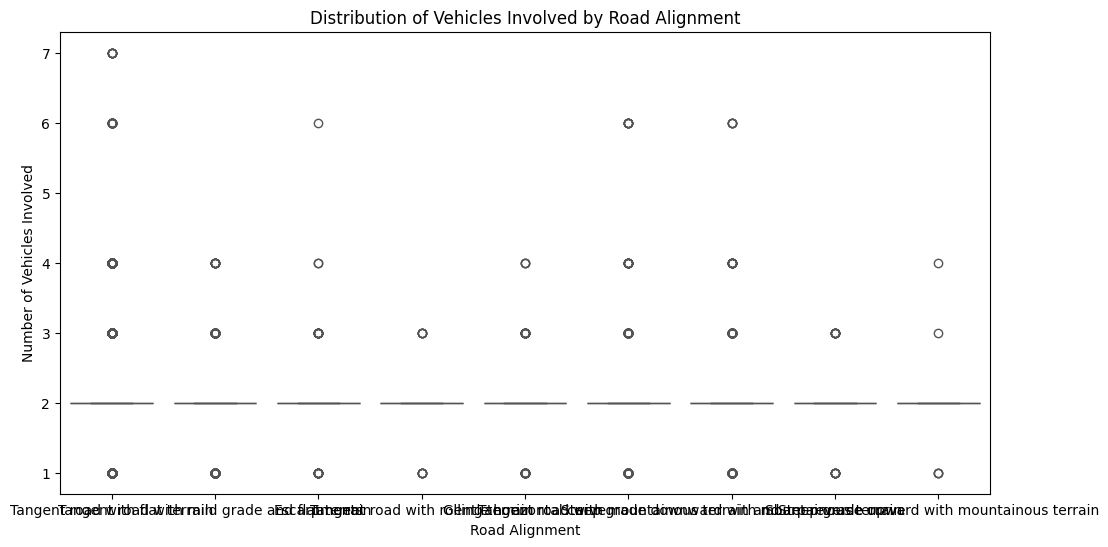

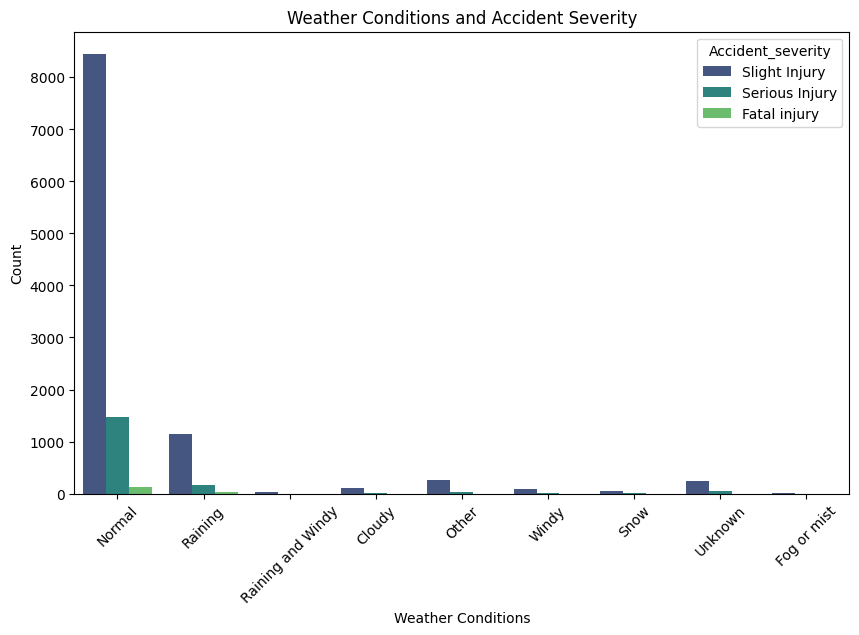

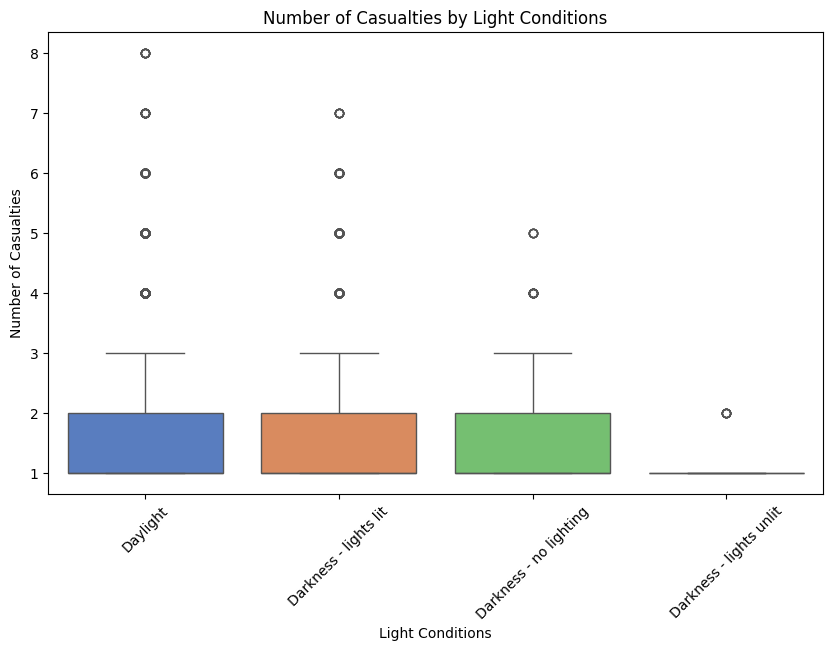

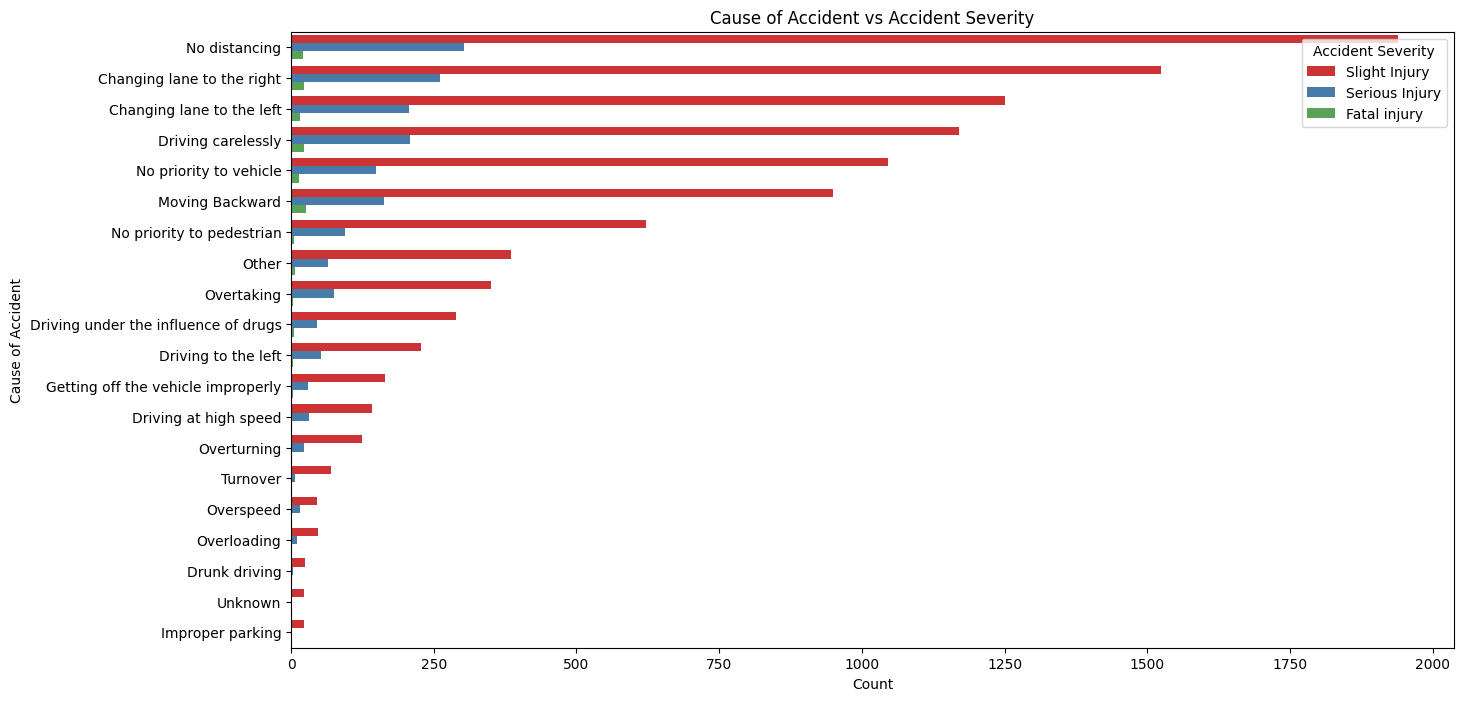

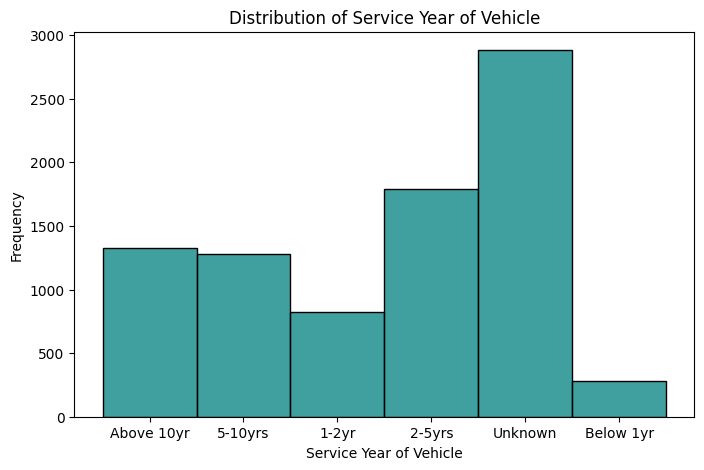

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'RTA Dataset.csv'
data = pd.read_csv(file_path)

# General Information
print("Dataset Info:")
print(data.info())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Summary statistics for numeric columns
numeric_summary = data.describe()
print("\nSummary Statistics for Numeric Columns:")
print(numeric_summary)

# Frequency distribution of categorical columns
categorical_summary = data.select_dtypes(include='object').nunique()
print("\nUnique Values in Categorical Columns:")
print(categorical_summary)

# Visualization 1: Distribution of Number of Vehicles Involved
plt.figure(figsize=(8, 5))
sns.histplot(data['Number_of_vehicles_involved'].dropna(), bins=15, kde=False, color='blue')
plt.title('Distribution of Number of Vehicles Involved')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Distribution of Accident Severity
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Accident_severity', order=data['Accident_severity'].dropna().value_counts().index, color='green')
plt.title('Accident Severity Distribution')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

# Visualization 3: Number of Casualties by Day of Week
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.dropna(subset=['Day_of_week', 'Number_of_casualties']), x='Day_of_week', y='Number_of_casualties', hue='Day_of_week', dodge=False, palette='Set2')
plt.title('Number of Casualties by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Casualties')
plt.legend([],[], frameon=False)
plt.show()

# Visualization 4: Traffic Pattern by Road Surface Type
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Road_surface_type', order=data['Road_surface_type'].dropna().value_counts().index, color='purple')
plt.title('Traffic Pattern by Road Surface Type')
plt.xlabel('Count')
plt.ylabel('Road Surface Type')
plt.show()

# Visualization 5: Distribution of Vehicles Involved by Road Alignment
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.dropna(subset=['Road_allignment', 'Number_of_vehicles_involved']), x='Road_allignment', y='Number_of_vehicles_involved', hue='Road_allignment', dodge=False, palette='coolwarm')
plt.title('Distribution of Vehicles Involved by Road Alignment')
plt.xlabel('Road Alignment')
plt.ylabel('Number of Vehicles Involved')
plt.legend([],[], frameon=False)
plt.show()

# Visualization 6: Weather Conditions and Accident Severity
plt.figure(figsize=(10, 6))
sns.countplot(data=data.dropna(subset=['Weather_conditions', 'Accident_severity']), x='Weather_conditions', hue='Accident_severity', palette='viridis')
plt.title('Weather Conditions and Accident Severity')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualization 7: Number of Casualties by Light Conditions
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.dropna(subset=['Light_conditions', 'Number_of_casualties']), x='Light_conditions', y='Number_of_casualties', hue='Light_conditions', dodge=False, palette='muted')
plt.title('Number of Casualties by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.show()

# Visualization 8: Cause of Accident vs Accident Severity
plt.figure(figsize=(15, 8))
sns.countplot(data=data.dropna(subset=['Cause_of_accident', 'Accident_severity']), y='Cause_of_accident', hue='Accident_severity', order=data['Cause_of_accident'].dropna().value_counts().index, palette='Set1')
plt.title('Cause of Accident vs Accident Severity')
plt.xlabel('Count')
plt.ylabel('Cause of Accident')
plt.legend(title='Accident Severity', loc='upper right')
plt.show()

# Visualization 9: Distribution of Service Year of Vehicle
plt.figure(figsize=(8, 5))
sns.histplot(data['Service_year_of_vehicle'].dropna(), bins=20, kde=False, color='teal')
plt.title('Distribution of Service Year of Vehicle')
plt.xlabel('Service Year of Vehicle')
plt.ylabel('Frequency')
plt.show()


# Logistic Regression Model

Accuracy: 83.77%

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.28      0.33      0.30      2464
weighted avg       0.70      0.84      0.76      2464


Confusion Matrix:
 [[   0    0   37]
 [   0    0  363]
 [   0    0 2064]]


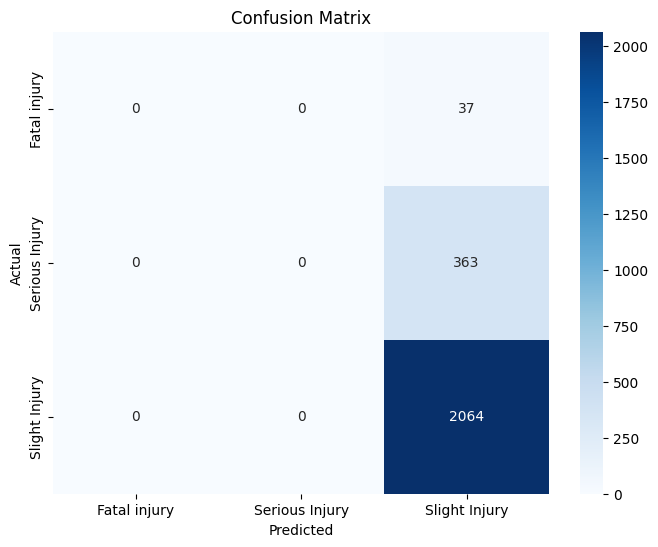

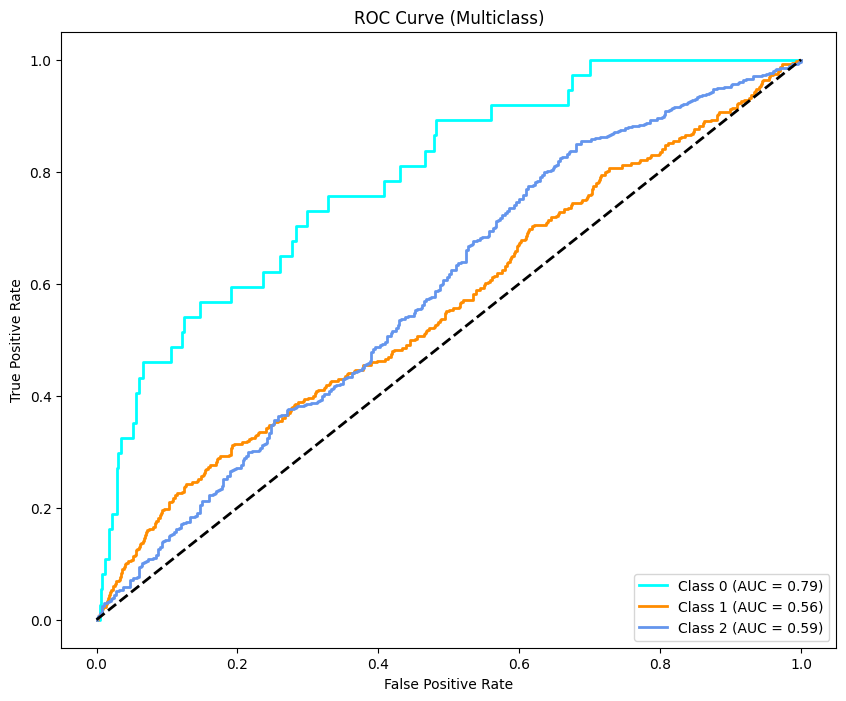

In [6]:
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv('RTA Dataset.csv')

# Handle missing values (dropping rows with missing target variable and imputing others)
data.dropna(subset=['Accident_severity'], inplace=True)
data.fillna(method='ffill', inplace=True)

# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = data.drop('Accident_severity', axis=1)
y = data['Accident_severity']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert accuracy to percentage
classification_rep = classification_report(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Accident_severity'].classes_, yticklabels=label_encoders['Accident_severity'].classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC (Multiclass)
# Binarize the target labels for ROC curve (since it's a multiclass problem)
y_test_binarized = pd.get_dummies(y_test).values
y_score = log_reg_model.predict_proba(X_test)

fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and ROC area for each class
for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for multiclass classification
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(y_test_binarized.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc='lower right')
plt.show()


# Logistic Regression Model Validation

In [7]:
import random
import pandas as pd

# Model Validation: Randomly select a row and classify accident severity
random_index = random.randint(0, X_test.shape[0] - 1)  # Get a random index within the range of test data
random_row = X_test[random_index].reshape(1, -1)  # Reshape the row to match model input requirements

# Make prediction for the selected row
random_prediction = log_reg_model.predict(random_row)[0]  # Predict the class label for Logistic Regression model

# Retrieve the actual label from y_test
actual_value = y_test.iloc[random_index]  # Use `iloc` for consistent access by position

# Decode the numerical predictions and actual value to their corresponding labels
decoded_prediction = label_encoders['Accident_severity'].inverse_transform([random_prediction])[0]
decoded_actual = label_encoders['Accident_severity'].inverse_transform([actual_value])[0]

# Print the results in terms of injury severity
print(f"Random Row Index: {random_index}")
print(f"Predicted Accident Severity: {decoded_prediction}")  # Predicted result
print(f"Actual Accident Severity: {decoded_actual}")  # Actual result


Random Row Index: 777
Predicted Accident Severity: Slight Injury
Actual Accident Severity: Slight Injury


# Decision Tree Model

Accuracy: 74.35%

Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.32      0.27        37
           1       0.25      0.29      0.27       363
           2       0.86      0.83      0.85      2064

    accuracy                           0.74      2464
   macro avg       0.45      0.48      0.46      2464
weighted avg       0.76      0.74      0.75      2464


Confusion Matrix:
 [[  12    5   20]
 [   6  107  250]
 [  33  318 1713]]


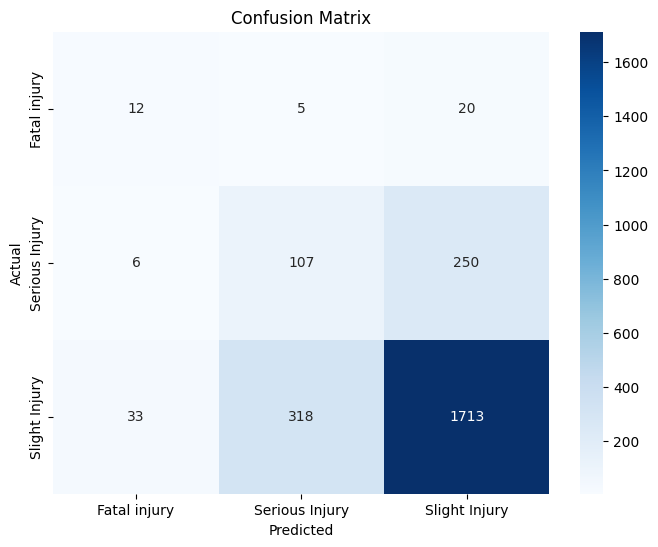

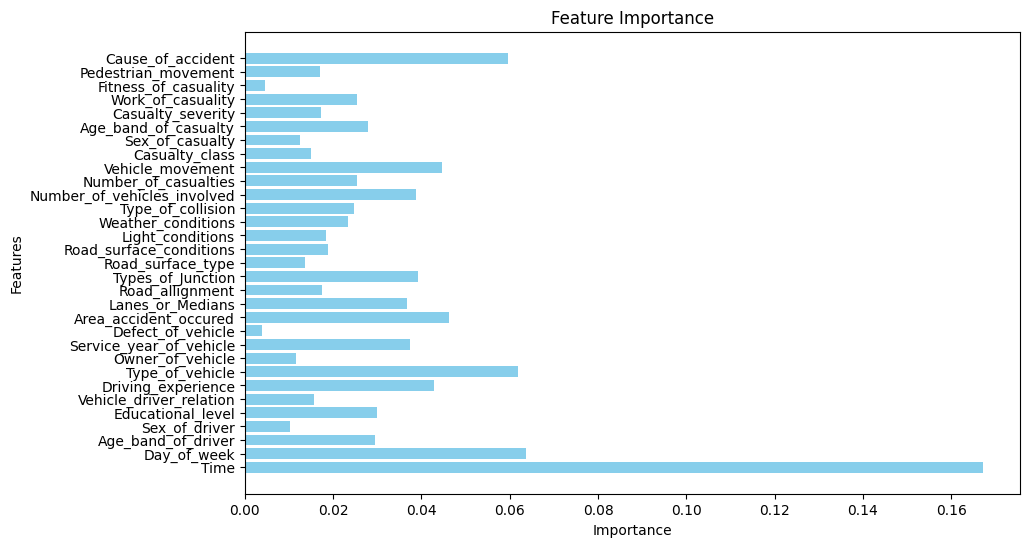

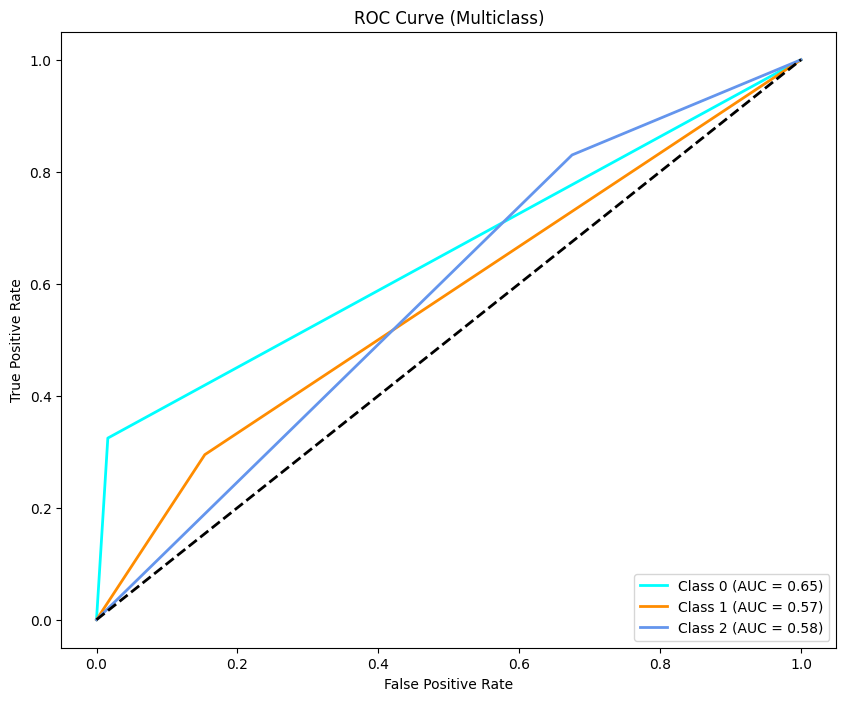

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('RTA Dataset.csv')

# Handle missing values (dropping rows with missing target variable and imputing others)
data.dropna(subset=['Accident_severity'], inplace=True)
data.fillna(method='ffill', inplace=True)

# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = data.drop('Accident_severity', axis=1)
y = data['Accident_severity']

# Binarize the target variable for ROC curve (multiclass handling)
y_binarized = label_binarize(y, classes=np.unique(y))
num_classes = y_binarized.shape[1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert accuracy to percentage
classification_rep = classification_report(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Accident_severity'].classes_, yticklabels=label_encoders['Accident_severity'].classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
feature_importances = dt_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# ROC Curve and AUC
if num_classes > 2:
    # For multiclass, calculate ROC curve and AUC for each class
    y_test_binarized = label_binarize(y_test, classes=np.unique(y))
    y_score = dt_model.predict_proba(X_test)

    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    colors = ['aqua', 'darkorange', 'cornflowerblue']
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Multiclass)')
    plt.legend(loc='lower right')
    plt.show()
else:
    # For binary classification
    y_score = dt_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


# Decision Tree Model Validation

In [9]:
import random
import pandas as pd

# Model Validation: Randomly select a row and classify accident severity
random_index = random.randint(0, X_test.shape[0] - 1)  # Get a random index within the range of test data
random_row = X_test[random_index].reshape(1, -1)  # Reshape the row to match model input requirements

# Make prediction for the selected row
random_prediction = dt_model.predict(random_row)[0]  # Predict the class label for Decision Tree model

# Retrieve the actual label from y_test
actual_value = y_test.iloc[random_index]  # Use `iloc` for consistent access by position

# Decode the numerical predictions and actual value to their corresponding labels
# Assuming your 'Accident_severity' classes are mapped to 'Slight Injury', 'Serious Injury', and 'Fatal Injury'
decoded_prediction = label_encoders['Accident_severity'].inverse_transform([random_prediction])[0]
decoded_actual = label_encoders['Accident_severity'].inverse_transform([actual_value])[0]

# Print the results in terms of injury severity
print(f"Random Row Index: {random_index}")
print(f"Predicted Accident Severity: {decoded_prediction}")  # Predicted result
print(f"Actual Accident Severity: {decoded_actual}")  # Actual result


Random Row Index: 207
Predicted Accident Severity: Slight Injury
Actual Accident Severity: Slight Injury


# Random Forest Model

Accuracy: 84.01%

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       1.00      0.02      0.03       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.61      0.34      0.32      2464
weighted avg       0.85      0.84      0.77      2464


Confusion Matrix:
 [[   0    0   37]
 [   0    6  357]
 [   0    0 2064]]


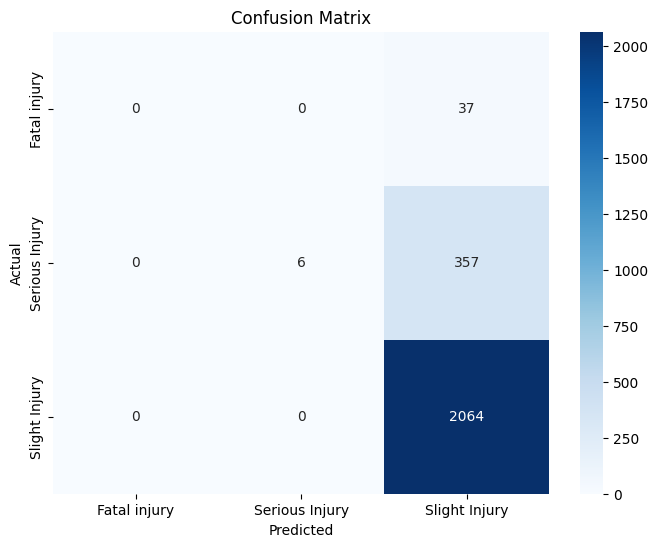

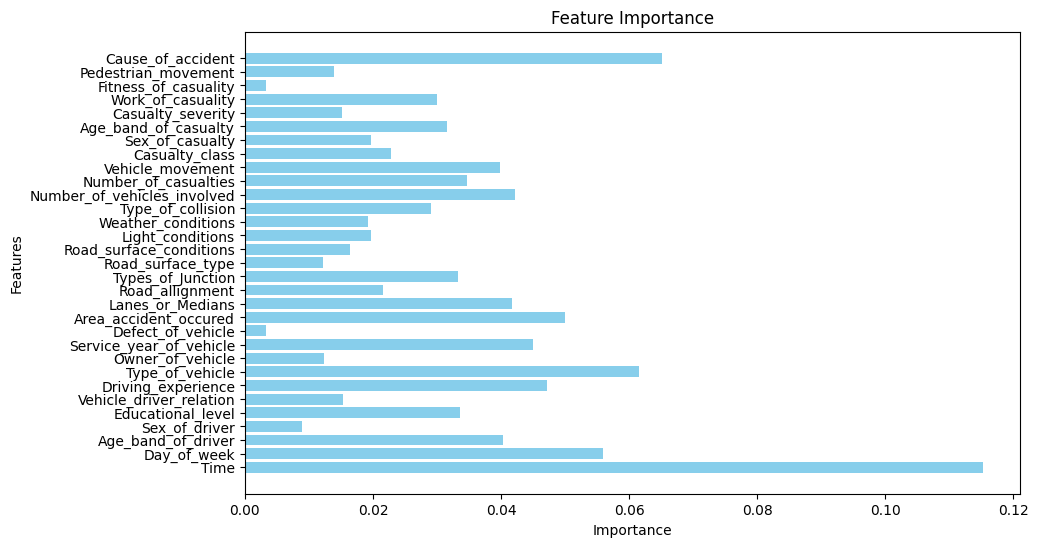

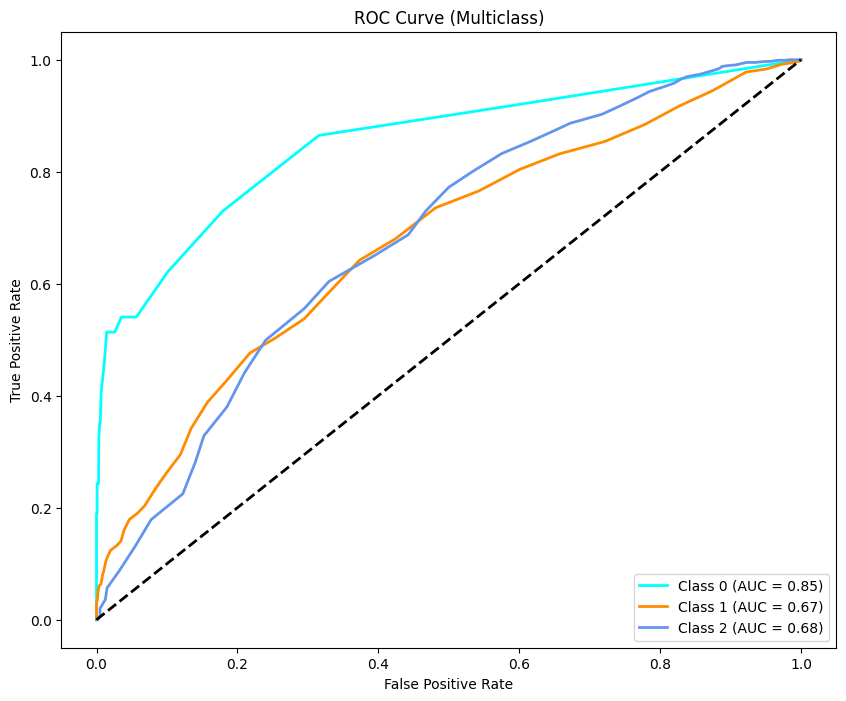

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('RTA Dataset.csv')

# Handle missing values (dropping rows with missing target variable and imputing others)
data.dropna(subset=['Accident_severity'], inplace=True)
data.fillna(method='ffill', inplace=True)

# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = data.drop('Accident_severity', axis=1)
y = data['Accident_severity']

# Binarize the target variable for ROC curve (multiclass handling)
y_binarized = label_binarize(y, classes=np.unique(y))
num_classes = y_binarized.shape[1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert accuracy to percentage
classification_rep = classification_report(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Accident_severity'].classes_, yticklabels=label_encoders['Accident_severity'].classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
feature_importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# ROC Curve and AUC
if num_classes > 2:
    # For multiclass, calculate ROC curve and AUC for each class
    y_test_binarized = label_binarize(y_test, classes=np.unique(y))
    y_score = rf_model.predict_proba(X_test)

    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    colors = ['aqua', 'darkorange', 'cornflowerblue']
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Multiclass)')
    plt.legend(loc='lower right')
    plt.show()
else:
    # For binary classification
    y_score = rf_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


# Random Forest Model Validation

In [11]:
import random
import pandas as pd

# Model Validation: Randomly select a row and classify accident severity
random_index = random.randint(0, X_test.shape[0] - 1)  # Get a random index within the range of test data
random_row = X_test[random_index].reshape(1, -1)  # Reshape the row to match model input requirements

# Make prediction for the selected row
random_prediction = rf_model.predict(random_row)[0]  # Predict the class label

# Retrieve the actual label from y_test
actual_value = y_test.iloc[random_index]  # Use `iloc` for consistent access by position

# Decode the numerical predictions and actual value to their corresponding labels
decoded_prediction = label_encoders['Accident_severity'].inverse_transform([random_prediction])[0]
decoded_actual = label_encoders['Accident_severity'].inverse_transform([actual_value])[0]

# Print the results
print(f"Random Row Index: {random_index}")
print(f"Predicted Accident Severity: {decoded_prediction}")
print(f"Actual Accident Severity: {decoded_actual}")


Random Row Index: 898
Predicted Accident Severity: Slight Injury
Actual Accident Severity: Slight Injury


# XG BOOST Model

Accuracy: 84.90%

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.16      0.27        37
           1       0.67      0.12      0.21       363
           2       0.85      0.99      0.92      2064

    accuracy                           0.85      2464
   macro avg       0.79      0.42      0.46      2464
weighted avg       0.83      0.85      0.80      2464


Confusion Matrix:
 [[   6    1   30]
 [   0   44  319]
 [   1   21 2042]]


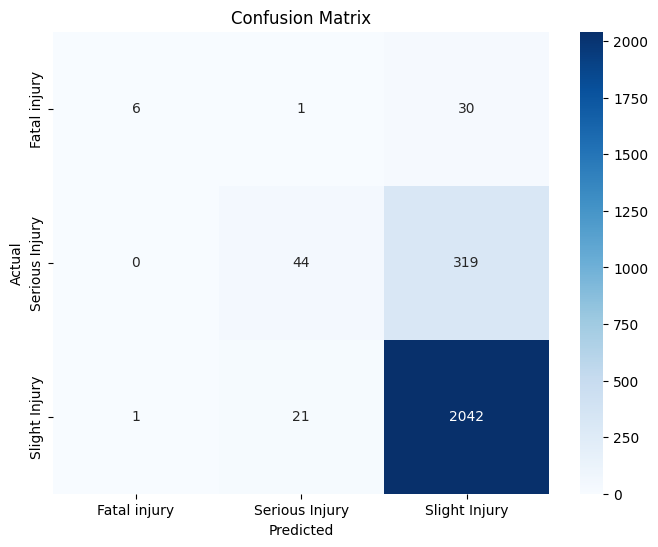

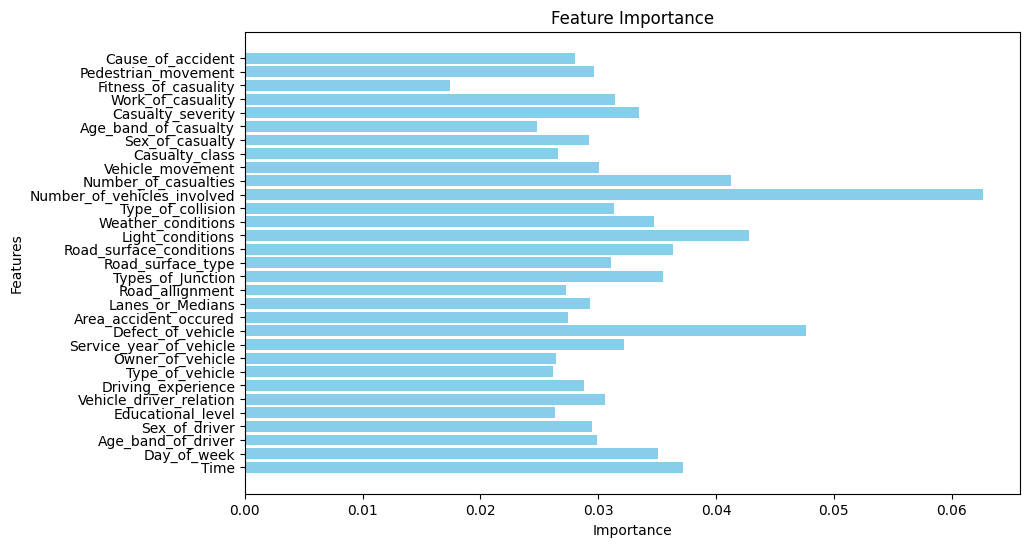

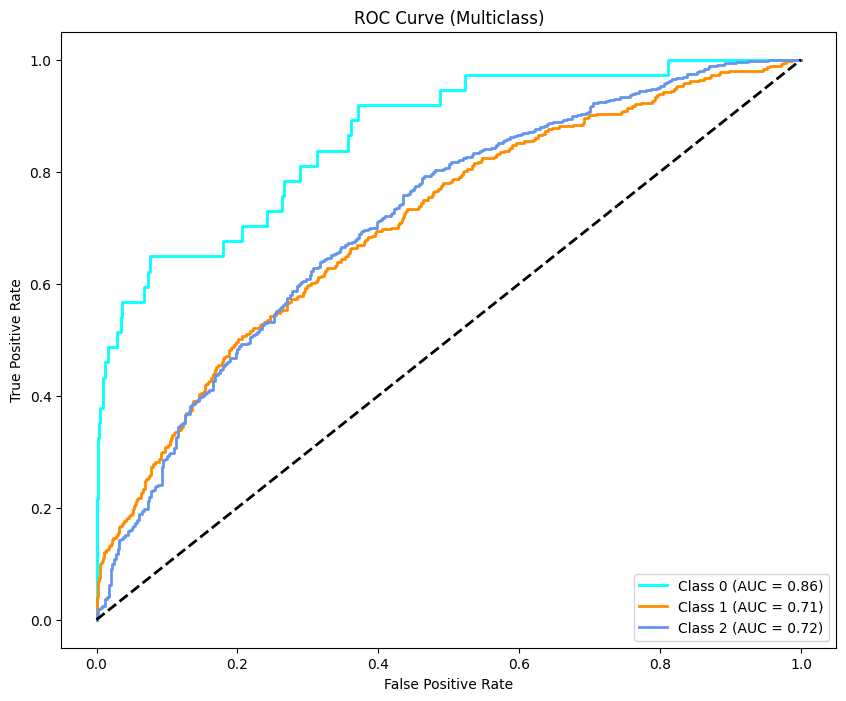

In [12]:
import random
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv('RTA Dataset.csv')

# Handle missing values (dropping rows with missing target variable and imputing others)
data.dropna(subset=['Accident_severity'], inplace=True)
data.fillna(method='ffill', inplace=True)

# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = data.drop('Accident_severity', axis=1)
y = data['Accident_severity']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert accuracy to percentage
classification_rep = classification_report(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Accident_severity'].classes_, yticklabels=label_encoders['Accident_severity'].classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
xgb_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, xgb_model.feature_importances_, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# ROC Curve and AUC (Multiclass)
# Binarize the target labels for ROC curve (since it's a multiclass problem)
y_test_binarized = pd.get_dummies(y_test).values
y_score = xgb_model.predict_proba(X_test)

fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and ROC area for each class
for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for multiclass classification
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(y_test_binarized.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc='lower right')
plt.show()


# XG BOOST Model Validation

In [13]:
import random
import pandas as pd

# Model Validation: Randomly select a row and classify accident severity
random_index = random.randint(0, X_test.shape[0] - 1)  # Get a random index within the range of test data
random_row = X_test[random_index].reshape(1, -1)  # Reshape the row to match model input requirements

# Make prediction for the selected row
random_prediction = xgb_model.predict(random_row)[0]  # Predict the class label for XGBoost model

# Retrieve the actual label from y_test
actual_value = y_test.iloc[random_index]  # Use `iloc` for consistent access by position

# Decode the numerical predictions and actual value to their corresponding labels
# Assuming your 'Accident_severity' classes are mapped to 'Slight Injury', 'Serious Injury', and 'Fatal Injury'
decoded_prediction = label_encoders['Accident_severity'].inverse_transform([random_prediction])[0]
decoded_actual = label_encoders['Accident_severity'].inverse_transform([actual_value])[0]

# Print the results in terms of injury severity
print(f"Random Row Index: {random_index}")
print(f"Predicted Accident Severity: {decoded_prediction}")  # Predicted result
print(f"Actual Accident Severity: {decoded_actual}")  # Actual result


Random Row Index: 2362
Predicted Accident Severity: Slight Injury
Actual Accident Severity: Slight Injury


# FINAL REPORT


## XG BOOST Accuracy - 84.90%

## Random Forest Accuracy - 84.01%

## Logistic Regression Accuracy - 83.77%

## Decision Tree Accuracy - 74.35%


### XG BOOST Algorithm is the best performer for this specific Problem(Road Accident Classification) using NON-IOT DATA. 